In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt


# Load and preprocess Data

In [3]:
xtrain=np.loadtxt("input.csv",delimiter=",")
ytrain=np.loadtxt("labels.csv",delimiter=",")
xtest=np.loadtxt("input_test.csv",delimiter=",")
ytest=np.loadtxt("labels_test.csv",delimiter=",")

In [4]:
xtrain=xtrain.reshape(len(xtrain),100,100,3)
ytrain=ytrain.reshape(len(ytrain),1)
xtest=xtest.reshape(len(xtest),100,100,3)
ytest=ytest.reshape(len(ytest),1)


In [5]:
xtrain=xtrain/255
xtest=xtest/255

In [6]:
xtrain.shape

(2000, 100, 100, 3)

In [7]:
ytrain.shape

(2000, 1)

In [8]:
xtest.shape

(400, 100, 100, 3)

In [9]:
ytest.shape

(400, 1)

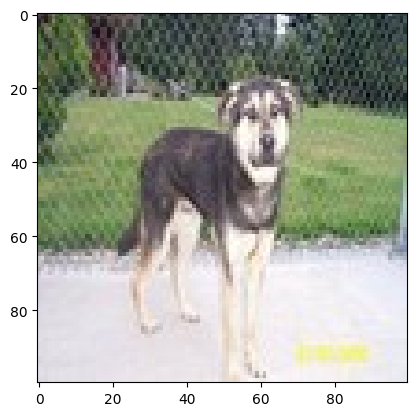

In [10]:
import random

idx=random.randint(0,len(xtrain))
plt.imshow(xtrain[idx,:])
plt.show()


# Define Model

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\mruna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy']) 

In [13]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.4812 - loss: 0.9133
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.6033 - loss: 0.6738
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.6969 - loss: 0.5948
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7016 - loss: 0.5525
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7849 - loss: 0.4742
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8375 - loss: 0.4008
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8634 - loss: 0.3370
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9249 - loss: 0.2444
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9326 - loss: 0.1915
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9525 - loss: 0.1448


In [14]:
loss,acc=model.evaluate(xtest,ytest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7389 - loss: 0.7081


In [15]:
print("Loss",loss)
print("accuracy",acc)

Loss 1.0208348035812378
accuracy 0.6349999904632568


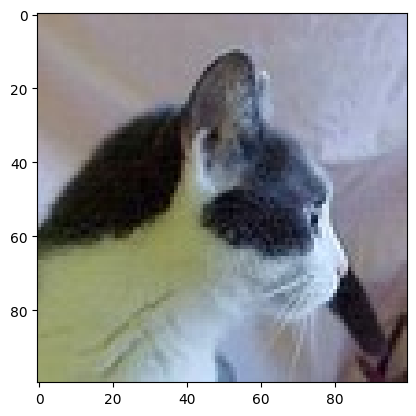

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
cat


In [23]:
img=random.randint(0,len(ytest))
plt.imshow(xtest[img,:])
plt.show()

y_pred=model.predict(xtest[img,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred="dog"
else:
    pred="cat"

print(pred)